## Setting up Colab

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [2]:
import findspark
findspark.init()

In [3]:
# Create a PySpark session
from collections.abc import MutableMapping
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# !wget http://raw-recipes-clean-upgrad.s3.amazonaws.com/RAW_recipes_cleaned.csv

# df = spark.read.csv('RAW_recipes_cleaned.csv', inferSchema = True, header = True)
# df.show()

In [4]:
#Upload Student_Grades_Data.csv file from local system to remote colab location
from google.colab import files
files.upload()

Saving Student_Grades_Data.csv to Student_Grades_Data.csv


{'Student_Grades_Data.csv': b'Time_to_Study,Grades\n1,1.5\n5,2.7\n7,3.1\n3,2.1\n2,1.8\n9,3.9\n6,2.9\n12,4.5\n11,4.3\n2,1.8\n4,2.4\n8,3.5\n13,4.8\n9,3.9\n14,5\n10,4.1\n6,2.9\n12,4.5\n1,1.5\n4,2.4\n14,5\n10,4.1\n11,4.3\n4,2.4\n5,2.7\n8,3.5\n1,1.5\n2,1.8\n3,2.1\n7,3.1\n8,3.5\n14,5\n7,3.1\n8,3.5\n1,1.5\n2,1.8\n3,2.1\n4,2.4\n5,2.7\n6,2.9\n7,3.1\n8,3.5\n9,3.9\n10,4.1\n11,4.3\n12,4.5\n13,4.8\n14,5\n8,3.5\n2,1.8\n'}

## Reading Dataset

In [5]:
#Loading the Student_Grades_Data.csv file, uploaded in previous step
data = spark.read.csv('Student_Grades_Data.csv', header=True, inferSchema=True)

In [8]:
data.printSchema()

root
 |-- Time_to_Study: integer (nullable = true)
 |-- Grades: double (nullable = true)



In [9]:
#Display first few rows of data
data.show()

+-------------+------+
|Time_to_Study|Grades|
+-------------+------+
|            1|   1.5|
|            5|   2.7|
|            7|   3.1|
|            3|   2.1|
|            2|   1.8|
|            9|   3.9|
|            6|   2.9|
|           12|   4.5|
|           11|   4.3|
|            2|   1.8|
|            4|   2.4|
|            8|   3.5|
|           13|   4.8|
|            9|   3.9|
|           14|   5.0|
|           10|   4.1|
|            6|   2.9|
|           12|   4.5|
|            1|   1.5|
|            4|   2.4|
+-------------+------+
only showing top 20 rows



## Implementing Linear regression using Spark MLLib library

In [10]:
#Create a Feature array by omitting the last column
feature_cols = data.columns[:-1]
from pyspark.ml.feature import VectorAssembler
vect_assembler = VectorAssembler(inputCols=feature_cols,outputCol="features")

In [11]:
#Utilize Assembler created above in order to add the feature column
data_w_features = vect_assembler.transform(data)

In [12]:

#Display the data having additional column named features. Had it been multiple linear regression problem, you could see all the
# independent variable values combined in one list
data_w_features.show()

+-------------+------+--------+
|Time_to_Study|Grades|features|
+-------------+------+--------+
|            1|   1.5|   [1.0]|
|            5|   2.7|   [5.0]|
|            7|   3.1|   [7.0]|
|            3|   2.1|   [3.0]|
|            2|   1.8|   [2.0]|
|            9|   3.9|   [9.0]|
|            6|   2.9|   [6.0]|
|           12|   4.5|  [12.0]|
|           11|   4.3|  [11.0]|
|            2|   1.8|   [2.0]|
|            4|   2.4|   [4.0]|
|            8|   3.5|   [8.0]|
|           13|   4.8|  [13.0]|
|            9|   3.9|   [9.0]|
|           14|   5.0|  [14.0]|
|           10|   4.1|  [10.0]|
|            6|   2.9|   [6.0]|
|           12|   4.5|  [12.0]|
|            1|   1.5|   [1.0]|
|            4|   2.4|   [4.0]|
+-------------+------+--------+
only showing top 20 rows



In [13]:
#Select only Features and Label from previous dataset as we need these two entities for building machine learning model
finalized_data = data_w_features.select("features","Grades")

finalized_data.show()

+--------+------+
|features|Grades|
+--------+------+
|   [1.0]|   1.5|
|   [5.0]|   2.7|
|   [7.0]|   3.1|
|   [3.0]|   2.1|
|   [2.0]|   1.8|
|   [9.0]|   3.9|
|   [6.0]|   2.9|
|  [12.0]|   4.5|
|  [11.0]|   4.3|
|   [2.0]|   1.8|
|   [4.0]|   2.4|
|   [8.0]|   3.5|
|  [13.0]|   4.8|
|   [9.0]|   3.9|
|  [14.0]|   5.0|
|  [10.0]|   4.1|
|   [6.0]|   2.9|
|  [12.0]|   4.5|
|   [1.0]|   1.5|
|   [4.0]|   2.4|
+--------+------+
only showing top 20 rows



In [14]:
#Split the data into training and test model with 70% obs. going in training and 30% in testing
train_dataset, test_dataset = finalized_data.randomSplit([0.7, 0.3])

In [15]:
#Import Linear Regression class called LinearRegression
from pyspark.ml.regression import LinearRegression

#Create the Linear Regression object named having feature column as features and Label column as Time_to_Study
LinReg = LinearRegression(featuresCol="features", labelCol="Grades")

#Train the model on the training using fit() method.
model = LinReg.fit(train_dataset)

In [16]:
#Predict the Grades using the evulate method
pred = model.evaluate(test_dataset)

#Show the predicted Grade values along side actual Grade values
pred.predictions.show()

+--------+------+------------------+
|features|Grades|        prediction|
+--------+------+------------------+
|   [2.0]|   1.8|1.8186201578517636|
|   [4.0]|   2.4|2.3639980041730917|
|   [5.0]|   2.7| 2.636686927333756|
|   [5.0]|   2.7| 2.636686927333756|
|   [7.0]|   3.1|3.1820647736550844|
|   [8.0]|   3.5|3.4547536968157484|
|   [8.0]|   3.5|3.4547536968157484|
|   [8.0]|   3.5|3.4547536968157484|
|   [8.0]|   3.5|3.4547536968157484|
|   [9.0]|   3.9|3.7274426199764124|
|  [10.0]|   4.1| 4.000131543137077|
|  [12.0]|   4.5| 4.545509389458405|
|  [12.0]|   4.5| 4.545509389458405|
|  [12.0]|   4.5| 4.545509389458405|
|  [13.0]|   4.8| 4.818198312619069|
+--------+------+------------------+



In [17]:
#Find out coefficient value
coefficient = model.coefficients
print ("The coefficient of the model is : %a" %coefficient)

#Find out intercept Value
intercept = model.intercept
print ("The Intercept of the model is : %f" %intercept)

The coefficient of the model is : DenseVector([0.2727])
The Intercept of the model is : 1.273242


In [18]:
#Evaluate the model using metric like Mean Absolute Error(MAE), Root Mean Square Error(RMSE) and R-Square
from pyspark.ml.evaluation import RegressionEvaluator
evaluation = RegressionEvaluator(labelCol="Grades", predictionCol="prediction")

# Root Mean Square Error
rmse = evaluation.evaluate(pred.predictions, {evaluation.metricName: "rmse"})
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = evaluation.evaluate(pred.predictions, {evaluation.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = evaluation.evaluate(pred.predictions, {evaluation.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = evaluation.evaluate(pred.predictions, {evaluation.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 0.069
MSE: 0.005
MAE: 0.058
r2: 0.993


## Implementing Linear regression using Scikit learn library

In [32]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
#Read Student Grades .csv file and divide the data into dependent and independent variables.
data = pd.read_csv('Student_Grades_Data.csv')
data.head()

,Time_to_Study,Grades
0,1,1.5
1,5,2.7
2,7,3.1
3,3,2.1
4,2,1.8


In [21]:
## creating X and y
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [23]:
X

array([[ 1],
       [ 5],
       [ 7],
       [ 3],
       [ 2],
       [ 9],
       [ 6],
       [12],
       [11],
       [ 2],
       [ 4],
       [ 8],
       [13],
       [ 9],
       [14],
       [10],
       [ 6],
       [12],
       [ 1],
       [ 4],
       [14],
       [10],
       [11],
       [ 4],
       [ 5],
       [ 8],
       [ 1],
       [ 2],
       [ 3],
       [ 7],
       [ 8],
       [14],
       [ 7],
       [ 8],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [ 8],
       [ 2]])

In [26]:
!pip install scikit-learn

In [28]:
#Split the data into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
#Fit the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [30]:
#Print the
print(f'a0 = {LinReg.intercept_}')
print(f'a1 = {LinReg.coef_}')

a0 = 1.3045041899441352
a1 = [0.2704027]


In [31]:
#Predicted grade scores from test dataset
y_predict = LinReg.predict(X_test)
y_predict

array([2.11571229, 3.46772579, 2.38611499, 3.46772579, 3.19732309,
       1.84530959, 2.65651769, 5.09014199, 4.27893389, 1.84530959,
       3.46772579, 1.84530959, 1.57490689, 1.57490689, 1.57490689])

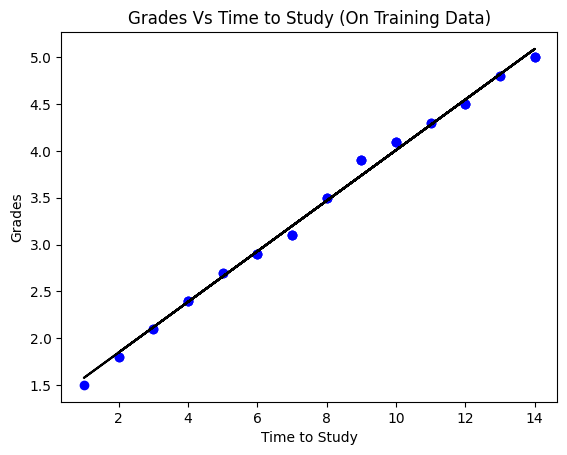

In [33]:
#Grades Vs Time to Study visualization on Training Data
plt.scatter(X_train, y_train, color='Blue')
plt.plot(X_train, LinReg.predict(X_train), color='Black')
plt.title('Grades Vs Time to Study (On Training Data)')
plt.xlabel('Time to Study')
plt.ylabel('Grades')
plt.show()

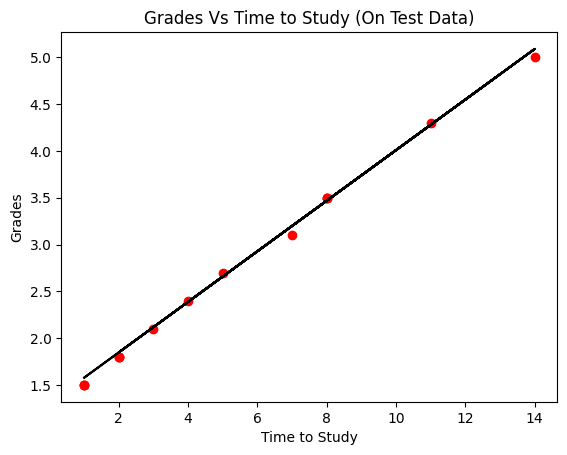

In [34]:
#Grades Vs Time to Study visualization on Test Data
plt.scatter(X_test, y_test, color='Red')
plt.plot(X_train, LinReg.predict(X_train), color='Black')
plt.title('Grades Vs Time to Study (On Test Data)')
plt.xlabel('Time to Study')
plt.ylabel('Grades')
plt.show()

In [36]:
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error:', r_square)

#Model Evaluation using Mean Square Error (MSE)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))

#Model Evaluation using Root Mean Square Error (RMSE)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

#Model Evaluation using Mean Absolute Error (MAE)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

R-Square Error: 0.997283498148368
Mean Squared Error: 0.003099226779173019
Root Mean Squared Error: 0.055670699467251346
Mean Absolute Error: 0.04927219118559932
